In [1]:
import numpy as np
import base64
from matplotlib import pyplot as plt

def base64_decode_image(a, dtype, shape):

    a = bytes(a, encoding='utf-8')

    # convert the string to a NumPy array using the supplied data
    # type and target shape
    a = np.frombuffer(base64.decodebytes(a), dtype=dtype)
    a = a.reshape(shape)

    # return the decoded image
    return a


In [2]:
import requests

url = "http://127.0.0.1:5000/predict"

payload={}
files=[
  ('image',('damaged003_jpg.rf.6999e73cd82f57970e729b22afef1ce4.jpg',open('/home/alexpm94/QR/data/train/damaged003_jpg.rf.6999e73cd82f57970e729b22afef1ce4.jpg','rb'),'image/jpeg'))
]
headers = {}

response = requests.request("POST", url, headers=headers, data=payload, files=files).json()

QR CONTENT:  kooTEK


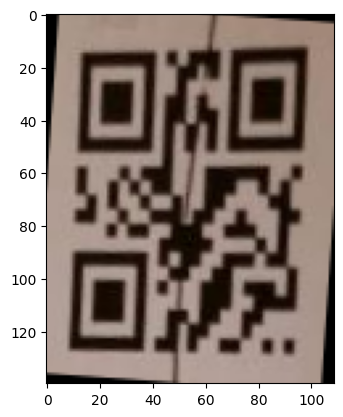

QR CONTENT:  None


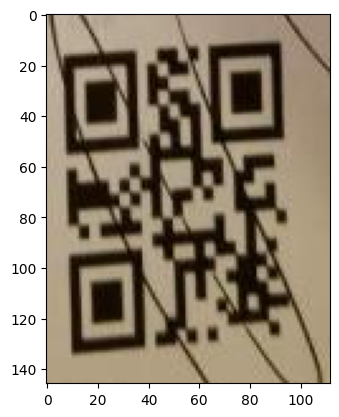

QR CONTENT:  are


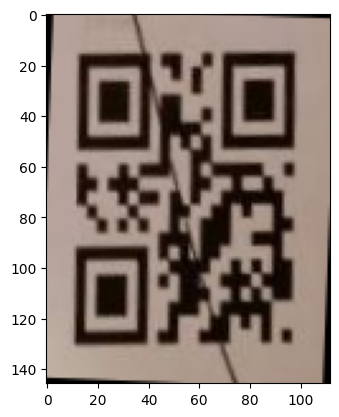

In [3]:
for i in range(len(response["predictions"])):
    shape, image_b64 = response["predictions"][i]["corrected_image"]
    qr_content = response["predictions"][i]["qr_content"]
    print("QR CONTENT: ", qr_content)
    image = base64_decode_image(image_b64, np.uint8, shape)
    plt.imshow(image)
    plt.show()